# Model Building Process

In [1]:
# Import the model dataset 
import pandas as pd
df = pd.read_csv("Model_data.csv")

In [2]:
## Applying CountVectorizer & TFIDF 
# Extracting features by CountVectorizer from reviews 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
reviews_feature_cv = count_vect.fit_transform(df.JwMarriot_reviews).toarray()
reviews_feature_cv.shape

(3000, 11259)

In [3]:
# Extracting features by TFIDF from reviews
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
reviews_feature_tfidf = tfidf_transformer.fit_transform(reviews_feature_cv).toarray()
reviews_feature_tfidf.shape

(3000, 11259)

In [4]:
## Aplying SMOTE oversampling technique for removing class imbalance 
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state = 50, sampling_strategy = "all")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
X_oversample, y_oversample = over_sample.fit_sample(reviews_feature_cv, df['Sentiments']) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Total count of target classes or 'Sentiments' 
len(y_oversample)

8589

In [7]:
# Total number of reviews features with classes 
X_oversample.shape

(8589, 11259)

In [8]:
# Count of Sentiments or target classes 
import collections, numpy
collections.Counter(y_oversample)

Counter({0: 2863, 1: 2863, 2: 2863})

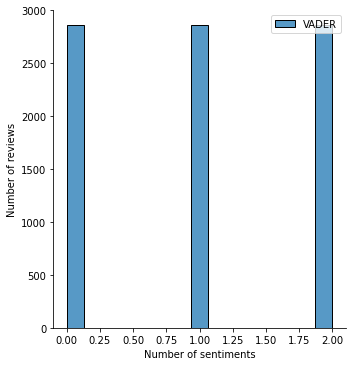

In [9]:
# Sentiments across reviews 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.displot(y_oversample, kde = False,  label = "VADER")
plt.xlabel("Number of sentiments")
plt.ylabel("Number of reviews")
plt.legend()
plt.show()

In [10]:
# Split data into train & test 
def split_into_words(i):
    return (i.split(" "))

In [11]:
seed = 7

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_oversample,y_oversample,test_size=0.2)

In [13]:
x_train.shape

(6871, 11259)

In [14]:
y_train.shape

(6871,)

In [15]:
x_test.shape

(1718, 11259)

In [16]:
y_test.shape

(1718,)

# Decision Tree Classifier 

In [27]:
# Decision Tree Classifier 
from sklearn import tree
model10 = tree.DecisionTreeClassifier(random_state=50,class_weight="balanced")
DT_clf = model10.fit(x_train, y_train)

[Text(313.6673105868962, 216.19034482758622, 'X[4260] <= 0.5\ngini = 0.667\nsamples = 6871\nvalue = [2290.333, 2290.333, 2290.333]'),
 Text(299.27350497983076, 213.69103448275862, 'X[5270] <= 0.5\ngini = 0.657\nsamples = 6090\nvalue = [2290.333, 1547.846, 2252.919]'),
 Text(287.333103280796, 211.19172413793103, 'X[1295] <= 0.5\ngini = 0.641\nsamples = 5646\nvalue = [2288.351, 1138.68, 2220.562]'),
 Text(281.5247609989205, 208.69241379310344, 'X[1079] <= 0.5\ngini = 0.618\nsamples = 5264\nvalue = [2286.369, 813.343, 2165.958]'),
 Text(276.6469602412078, 206.19310344827585, 'X[2801] <= 0.5\ngini = 0.603\nsamples = 5106\nvalue = [2286.369, 656.662, 2164.946]'),
 Text(270.5671135290762, 203.6937931034483, 'X[10672] <= 0.5\ngini = 0.604\nsamples = 4827\nvalue = [2286.369, 650.674, 1888.893]'),
 Text(264.53367811030245, 201.1944827586207, 'X[10995] <= 0.5\ngini = 0.612\nsamples = 4537\nvalue = [1999.954, 649.676, 1888.893]'),
 Text(256.1425620760486, 198.6951724137931, 'X[10993] <= 0.5\ngini

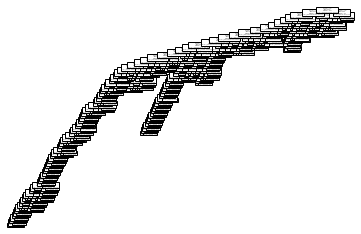

In [28]:
tree.plot_tree(DT_clf) 

In [29]:
# Testing Accuracy of Decision Tree Classifier 
import numpy as np
predicted18 = DT_clf.predict(x_test)
np.mean(predicted18 == y_test) 

0.9545983701979045

In [30]:
# Training Accuracy of Decision Tree Classifier 
import numpy as np
predicted19 = DT_clf.predict(x_train) 
np.mean(predicted19 == y_train)

0.9966525978751274

In [31]:
# Testing classification report 
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_test, predicted18))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       552
           1       0.97      0.90      0.94       568
           2       0.92      0.97      0.94       598

    accuracy                           0.95      1718
   macro avg       0.96      0.95      0.95      1718
weighted avg       0.96      0.95      0.95      1718



In [32]:
# Training classification report 
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_train, predicted19))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2311
           1       1.00      1.00      1.00      2295
           2       0.99      1.00      0.99      2265

    accuracy                           1.00      6871
   macro avg       1.00      1.00      1.00      6871
weighted avg       1.00      1.00      1.00      6871

